In [1]:
import pandas as pd
import subprocess
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/filtered_data.csv')

In [3]:
df.head()

,Protein ID,simple_fasta,Species,Tm
0,Q9M9P0_EXPA13,MQRFLLPLLFLALSPPAICHYSSSTSSPSSSSVSSDASEWRPARAT...,A.thaliana,40.301
1,Q9LY74_VTE3,MASLMLNGAITFPKGLGSPGSNLHARSIPRPTLLSVTRTSTPRLSV...,A.thaliana,38.410
2,O65784_CYP71B5,MSIFLCFLLLLPLSLIFLKKLLPSKGKLPPGPKGLPIIGNLHQFGR...,A.thaliana,36.698
3,Q7XJ60_EB1A,MATNIGMMDSAYFVGRNEILTWINDRLHLNLSRVEEAASGAVQCQM...,A.thaliana,39.462
4,Q8W4M5_PFP-BETA1,MAPALAVTRDLTAVGSPENAPAKGRASVYSEVQSSRINNTLPLPSV...,A.thaliana,41.074


#### Number raws

In [4]:
df.shape

(31796, 4)

In [5]:
print(f'The minimum temperature is {df.Tm.min()}')

The minimum temperature is 27.58


In [6]:
print(f'The maximum temperature is {df.Tm.max()}')

The maximum temperature is 98.94


##### Split data to category

In [7]:
Thermophilic = df[(df['Tm'] >= 45) & (df['Tm'] < 75)]
Mesophilic = df[df['Tm'] < 45]
Hyperthermophilic = df[df.Tm >= 75]


In [8]:
df.shape[0] == Mesophilic.shape[0] + Thermophilic.shape[0] + Hyperthermophilic.shape[0]

True

In [9]:
print(f'Number of Mesophilic poteins {Mesophilic.shape[0]}')

Number of Mesophilic poteins 7520


In [10]:
print(f'Number of Mesophilic poteins {Thermophilic.shape[0]}') 

Number of Mesophilic poteins 22322


In [11]:
print(f'Number of Mesophilic poteins {Hyperthermophilic.shape[0]}') 

Number of Mesophilic poteins 1954


#### Calculate frequency of each category

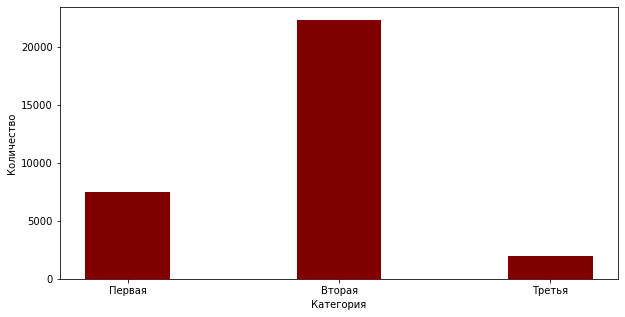

In [12]:
data = {'Первая': Mesophilic.shape[0], 'Вторая': Thermophilic.shape[0], 'Третья': Hyperthermophilic.shape[0]}
category = list(data.keys())
frequency = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(category, frequency, color ='maroon',
        width = 0.4)
 
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.show()

#### Get clusters within each temperature category using CD-HIT

In [19]:
def cluster(df, name):
    prot_id = list(df['Protein ID'])
    fasta = list(df['simple_fasta'])
    with open('../data/'+name+'.fasta', 'w') as fi:
        for i in range(len(prot_id)):
            fi.write('>'+prot_id[i]+'\n')
            fi.write(fasta[i]+'\n')
    subprocess.run(f'cd-hit -i ../data/{name}.fasta -o ../data/{name}cd_hit_out -c 0.7 -n 4 -d 100 -T 0', shell=True)
    
           
    

In [20]:
groups = {'Thermophilic': Thermophilic, 'Mesophilic': Mesophilic, 
          'Hyperthermophilic': Hyperthermophilic}

In [21]:
for key in groups:
    cluster(groups[key], key)
    

Program: CD-HIT, V4.8.1 (+OpenMP), Apr 07 2021, 10:57:21
Command: cd-hit -i ../data/Thermophilic.fasta -o
         ../data/Thermophiliccd_hit_out -c 0.7 -n 4 -d 100 -T 0

Started: Sat Jul  1 12:43:17 2023
                            Output                              
----------------------------------------------------------------
total number of CPUs in the system is 12
Actual number of CPUs to be used: 12

Your word length is 4, using 5 may be faster!
total seq: 22322
longest and shortest : 1019 and 31
Total letters: 9194948
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 12M
Buffer          : 12 X 10M = 131M
Table           : 2 X 3M = 6M
Miscellaneous   : 0M
Total           : 150M

Table limit with the given memory limit:
Max number of representatives: 1076342
Max number of word counting entries: 81131972

# comparing sequences from          0  to       1594
.---------- new table with     1145 representatives
# comparing sequences from       

----------    323 remaining sequences to the next cycle
---------- new table with      109 representatives
# comparing sequences from       1512  to       1941
----------    285 remaining sequences to the next cycle
---------- new table with      138 representatives
# comparing sequences from       1656  to       2074
----------    289 remaining sequences to the next cycle
---------- new table with      126 representatives
# comparing sequences from       1785  to       2194
----------    256 remaining sequences to the next cycle
---------- new table with      146 representatives
# comparing sequences from       1938  to       2336
----------    264 remaining sequences to the next cycle
---------- new table with      130 representatives
# comparing sequences from       2072  to       2461
----------    235 remaining sequences to the next cycle
---------- new table with      152 representatives
# comparing sequences from       2226  to       2604
----------    245 remaining sequences to

....................---------- new table with      768 representatives

     1954  finished       1550  clusters

Approximated maximum memory consumption: 137M
writing new database
writing clustering information
program completed !

Total CPU time 0.78
